# AgCAP Tool

--------------------------
## Description of the code
The main purpose of this notebook is to:
- Takes as input the enhanced settlement layer with all the relevant data extracted into it, with the data extraction tool
- Performs the required transformations
- Calculates the main composite indices required for the analysis
- Visualizes the results
- Allows to perform a multi-criteria analysis for customized site selection and ranking processes

# Preparation

## Importing necessary packages (Mandatory)

Packages to be used are imported from the funcs.ipynb.

In [71]:
from ipynb.fs.full.funcs import *
import leafmap.kepler as leafmap
import ipywidgets as widgets
#widgets.IntSlider()  # This triggers widget extension loading
%run funcs.ipynb #reload functions

## Setting the target coordinate system (Mandatory)

When calculating distances it is important to choose a coordinate system that represents distances correctly in your area of interst. The coordinate system that is given below is the World Mercator, these coordinate system works well for Sub Saharan Africa but the distortions get larger as you move away from the equator.TEST

In order to select your own coordinate system go to [epsg.io](http://epsg.io/) and type in your area of interest, this will give you a list of coordinate systems to choose from. Once you have selected your coordinate system replace the numbers below with the numbers from your coordinate system **(keep the "EPSG" part)**.

**NOTE** When selecting your coordinate system make sure that you select a system with the unit of meters, this is indicated for all systems on [epsg.io](http://epsg.io/)

In [60]:
## Coordinate and projection systems
crs_WGS84 = pyproj.CRS("EPSG:4326")    # Originan WGS84 coordinate system
crs_proj = pyproj.CRS("EPSG:32637")    # Projection system for the selected country -- see http://epsg.io/ for more info

## Define workspace and main directories

Define the workspace. The output layers will populate this folder. It is highly recommended to select an empty folder as your workspace.

In [61]:
ROOT_DIR = os.path.abspath(os.getcwd())
in_path = ROOT_DIR + "\\" + 'GIS_data'
workspace = ROOT_DIR + "\\" + "Output"

## Import the enhanced settlement layer

In [62]:
#Import settlements (in case the previous data extraction has already been done and the exported settmelemt dataset is availlable)
settles_gdf = gpd.read_file(workspace + r"\settles_gdf.shp")

## Import admin boundary as geodataframe
For the administrative boundaries you will have to select an **Polygon** layer represeting your area of interest.

In [63]:
# Define path and name of the file
admin_path = in_path + "\\" + "Admin"
admin_name = "moz_admin1.gpkg"

In [64]:
# Create a new geo-dataframe
admin_gdf = gpd.read_file(admin_path + "\\" + admin_name)
test_admin_gdf = gpd.read_file(admin_path + "\\" + admin_name) ### This is just for the test case study (MV and TRX extraction)
##Activate this if you want to clip part of the AoI e.g., for testing
admin_gdf = admin_gdf[admin_gdf.ADM2_NAME == "Mopeia"]


## Add buffer for clipping
## cap_style refers to the type of geometry generated; 3=rectangular (see shapely documectation for more info -- https://shapely.readthedocs.io/en/stable/manual.html)
admin_gdf_buf = admin_gdf.copy()
admin_gdf_buf['geometry'] = admin_gdf_buf.apply(lambda x:
                                        x.geometry.buffer(0.008, cap_style=3), axis=1)  ### 0.008 deg = ~1km

## Import influence areas (voronoi polygons) - TO BE UPDATED

In [65]:
voronoi_path = 'GIS_data/voronoi_TEMP/influence_areas_voronoi.gpkg'
voronoi_gdf = gpd.read_file(voronoi_path,layer="influence_areas_voronoi")
voronoi_gdf = voronoi_gdf.to_crs(admin_gdf.crs)
voronoi_gdf = voronoi_gdf.clip(admin_gdf)


In [107]:

# Create a Kepler map
m = leafmap.Map(center=[admin_gdf.geometry.centroid.y.mean(), admin_gdf.geometry.centroid.x.mean()], zoom=9)

# Add the GeoDataFrame to the map
m.add_gdf(settles_gdf, layer_name="Settlements")
m.add_gdf(voronoi_gdf, layer_name="voronoi")
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': -17.832917645779233, 'longitude': 36.06259664…

## Visualize admin boundaries and settlements

In [67]:

# Calculate map center from admin_gdf centroid
center = [admin_gdf.geometry.unary_union.centroid.y, admin_gdf.geometry.unary_union.centroid.x]

# Create an interactive map with kepler.gl backend
m = leafmap.Map(center=center, zoom=8, height=600, widescreen=True)

# Add your GeoDataFrames as layers
m.add_gdf(settles_gdf, layer_name="Settlements")
m.add_gdf(admin_gdf, layer_name="Admin Boundary")


m.config={'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'vbslyyq',
     'type': 'geojson',
     'config': {'dataId': 'Settlements',
      'label': 'Settlements',
      'color': [241, 92, 23],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.67,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [34, 63, 154],
       'colorRange': {'name': 'ColorBrewer OrRd-6',
        'type': 'sequential',
        'category': 'ColorBrewer',
        'colors': ['#fef0d9',
         '#fdd49e',
         '#fdbb84',
         '#fc8d59',
         '#e34a33',
         '#b30000']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'FAI_norm', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': '9ezwucn',
     'type': 'geojson',
     'config': {'dataId': 'Admin Boundary',
      'label': 'Admin Boundary',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 1.5,
       'strokeColor': [255, 250, 102],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': False,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {                        
                        # Show ALL columns for Admin Boundary
                        'Admin Boundary': [{'name': col, 'format': None} for col in admin_gdf.columns],
                        # Show ALL columns for Settlements 
                        'Settlements': [{'name': col, 'format': None} for col in settles_gdf.columns]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -17.87882032093565,
   'longitude': 35.77426007704404,
   'pitch': 0,
   'zoom': 8.520916581219378,
   'isSplit': False},
  'mapStyle': {'styleType': 'satellite',
   'topLayerGroups': {},
   'visibleLayerGroups': {},
   'threeDBuildingColor': [3.7245996603793508,
    6.518049405663864,
    13.036098811327728],
   'mapStyles': {}}}}
  
m

Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vbslyyq', 'type': 'geoj…

# Calculation of composite indices

## Schematic

![alt text](chart_1.jpeg)
![alt text](chart_2.png)

## Farming activity index
Compute the farming activity index, which is a proxy for farming activity, based on:
1. Farming volume: Cropland area within each settlement's influence area (Voronoi polygon)
2. Farming density: Percentage of each settlement's influence area (Voronoi polygon) occupied by crops


In [76]:
settles_gdf= create_FAI(settles_gdf,'Cropland_h','Crop%')
settles_gdf['FAI_norm'].describe()

count    66.000000
mean      0.148091
std       0.204634
min       0.000000
25%       0.017000
50%       0.067000
75%       0.203250
max       1.000000
Name: FAI_norm, dtype: float64

Text(0.5, 1.0, 'Farming Activity Index')

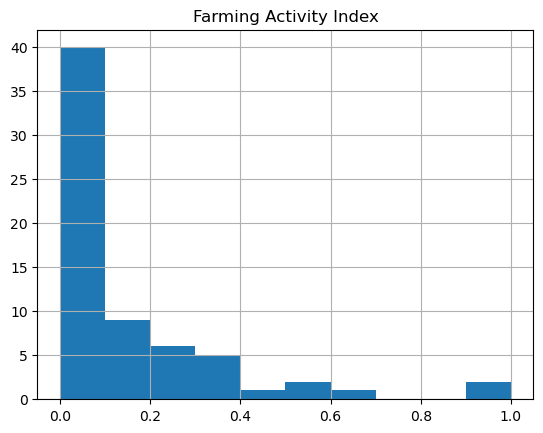

In [77]:
plt=settles_gdf['FAI_norm'].hist()
plt.set_title('Farming Activity Index')

In [80]:
#Visualize FAI_norm
# Calculate map center from admin_gdf centroid
center = [admin_gdf.geometry.unary_union.centroid.y, admin_gdf.geometry.unary_union.centroid.x]

# Create an interactive map with kepler.gl backend
m = leafmap.Map(center=center, zoom=8, height=600, widescreen=True)

# Add your GeoDataFrames as layers
m.add_gdf(settles_gdf, layer_name="Settlements")
m.add_gdf(admin_gdf, layer_name="Admin Boundary")


m.config={'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'vbslyyq',
     'type': 'geojson',
     'config': {'dataId': 'Settlements',
      'label': 'Settlements',
      'color': [241, 92, 23],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.67,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [34, 63, 154],
       'colorRange': {'name': 'ColorBrewer OrRd-6',
        'type': 'sequential',
        'category': 'ColorBrewer',
        'colors': ['#fef0d9',
         '#fdd49e',
         '#fdbb84',
         '#fc8d59',
         '#e34a33',
         '#b30000']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'FAI_norm', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': '9ezwucn',
     'type': 'geojson',
     'config': {'dataId': 'Admin Boundary',
      'label': 'Admin Boundary',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 1.5,
       'strokeColor': [255, 250, 102],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': False,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {                        
                        # Show ALL columns for Admin Boundary
                        'Admin Boundary': [{'name': col, 'format': None} for col in admin_gdf.columns],
                        # Show ALL columns for Settlements 
                        'Settlements': [{'name': col, 'format': None} for col in settles_gdf.columns]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -17.87882032093565,
   'longitude': 35.77426007704404,
   'pitch': 0,
   'zoom': 8.520916581219378,
   'isSplit': False},
  'mapStyle': {'styleType': 'satellite',
   'topLayerGroups': {},
   'visibleLayerGroups': {},
   'threeDBuildingColor': [3.7245996603793508,
    6.518049405663864,
    13.036098811327728],
   'mapStyles': {}}}}
  
m

Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vbslyyq', 'type': 'geoj…

## Market accessibility indices (MAIs)

**The market accessibility index is a proxy for the possibility to trade or export agricultural products based on a weighted average of:
- travel time to the capital city (potential for export and national distribution)
- travel time to major cities (potential for sales in fresh markets and national distribution)
- travel time to ports (potential for export)
- travel time to railway stations (potential for export and national distribution)
- travel time to airports (potential for export and national distribution)
- population sum within 20 km radius (potential for sales in fresh markets)

The weights selection depends on the type of application and the sepecific agricultural product. Hence, different MAIs are calculated for each Demand Index

## Post-Harvest Cooling Demand Index (Export Market)

### Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (Export Market)

Text(0.5, 1.0, 'Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (Export Market)')

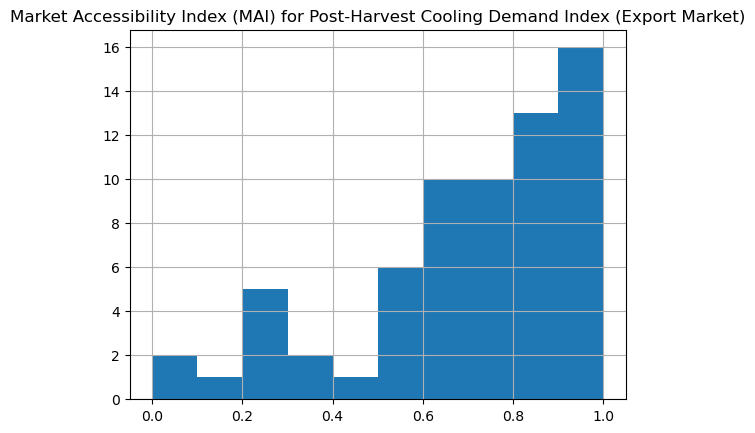

In [84]:
settles_gdf['MAI_PH_exp']= Create_MAI(
    settles_gdf,
    airport_dist_col='airport_di',
    port_dist_col='port_dist',
    railway_dist_col='railway_di',
    capital_dist_col='capital_di',
    cities_dist_col='cities_dis',
    pop_20km_col='pop_20km',
    airport_dist_w=0.25,
    port_dist_w=0.25,
    railway_dist_w=0.25,
    capital_dist_w=0.25,
    cities_dist_w=0,
    pop_20km_w=0,
)
plt=settles_gdf['MAI_PH_exp'].hist()
plt.set_title('Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (Export Market)')

In [98]:
# Display MAI_PH_exp
# Calculate centroids of your polygon GeoDataFrame
centroids = settles_gdf.geometry.centroid
centroids_gdf = settles_gdf.copy()
centroids_gdf.geometry = centroids

# Create a kepler.gl map centered on the mean centroid location
center = [centroids.y.mean(), centroids.x.mean()]
m = leafmap.Map(center=center, zoom=8, height=600, backend='kepler')

# Add the centroids GeoDataFrame as a point layer, colored by 'MAI_PH_exp'
m.add_gdf(centroids_gdf, layer_name='Centroids')
m.add_gdf(admin_gdf, layer_name="Admin Boundary")

m.config={'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '8h9cf3',
     'type': 'geojson',
     'config': {'dataId': 'Centroids',
      'label': 'Centroids',
      'color': [34, 63, 154],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'MAI_PH_exp', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': 'sfqsih9',
     'type': 'geojson',
     'config': {'dataId': 'Admin Boundary',
      'label': 'Admin Boundary',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [18, 92, 119],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': False,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Centroids': [{'name': 'ADM2_NAME',
        'format': None},
       {'name': 'MAI_PH_exp', 'format': None},
       {'name': 'FAI_norm', 'format': None},
       {'name': 'id', 'format': None}],
      'Admin Boundary': [{'name': 'ADM1_NAME', 'format': None},
       {'name': 'ADM2_NAME', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -17.874942085630945,
   'longitude': 35.83214449690558,
   'pitch': 0,
   'zoom': 8.385597234680752,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

# Display the map
m


Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '8h9cf3', 'type': 'geojs…

### Post-Harvest Cooling Demand Index (Export Market)

Text(0.5, 1.0, 'Post-Harvest Cooling Demand Index (Export Market)')

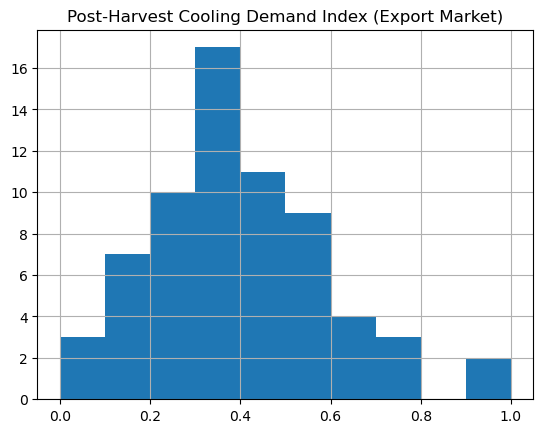

In [88]:
settles_gdf['DI_COOL_PH_exp'] = create_DI_COOL_PH(
    settles_gdf,
    FAI_norm_col='FAI_norm',
    avg_temp_col='avg_temp',
    HD30_hist_col='HD30_hist',
    MAI_PH_exp_col='MAI_PH_exp',
    FAI_w=0.5,
    avg_temp_w=0.1,
    HD30_hist_w=0.1,
    MAI_PH_exp_w=0.3,
)
plt=settles_gdf['DI_COOL_PH_exp'].hist()
plt.set_title('Post-Harvest Cooling Demand Index (Export Market)')

In [99]:
#Visualize Post-Harvest Cooling Demand Index (Export Market)
import leafmap.kepler as leafmap
import ipywidgets as widgets
widgets.IntSlider()  # This triggers widget extension loading


# Calculate map center from admin_gdf centroid
center = [admin_gdf.geometry.unary_union.centroid.y, admin_gdf.geometry.unary_union.centroid.x]

# Create an interactive map with kepler.gl backend
m = leafmap.Map(center=center, zoom=8, height=600, widescreen=True)

# Add your GeoDataFrames as layers
m.add_gdf(settles_gdf, layer_name="Settlements")
m.add_gdf(admin_gdf, layer_name="Admin Boundary")


m.config={'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'vbslyyq',
     'type': 'geojson',
     'config': {'dataId': 'Settlements',
      'label': 'Settlements',
      'color': [241, 92, 23],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.67,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [34, 63, 154],
       'colorRange': {'name': 'ColorBrewer OrRd-6',
        'type': 'sequential',
        'category': 'ColorBrewer',
        'colors': ['#fef0d9',
         '#fdd49e',
         '#fdbb84',
         '#fc8d59',
         '#e34a33',
         '#b30000']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'DI_COOL_PH_exp', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': '9ezwucn',
     'type': 'geojson',
     'config': {'dataId': 'Admin Boundary',
      'label': 'Admin Boundary',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 1.5,
       'strokeColor': [255, 250, 102],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': False,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {                        
                        # Show ALL columns for Admin Boundary
                        'Admin Boundary': [{'name': col, 'format': None} for col in admin_gdf.columns],
                        # Show ALL columns for Settlements 
                        'Settlements': [{'name': col, 'format': None} for col in settles_gdf.columns]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -17.87882032093565,
   'longitude': 35.77426007704404,
   'pitch': 0,
   'zoom': 8.520916581219378,
   'isSplit': False},
  'mapStyle': {'styleType': 'satellite',
   'topLayerGroups': {},
   'visibleLayerGroups': {},
   'threeDBuildingColor': [3.7245996603793508,
    6.518049405663864,
    13.036098811327728],
   'mapStyles': {}}}}
  
m

Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vbslyyq', 'type': 'geoj…

## Post-Harvest Cooling Demand Index (National Distribution)

### Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (National Distribution)

Text(0.5, 1.0, 'Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (National Distribution)')

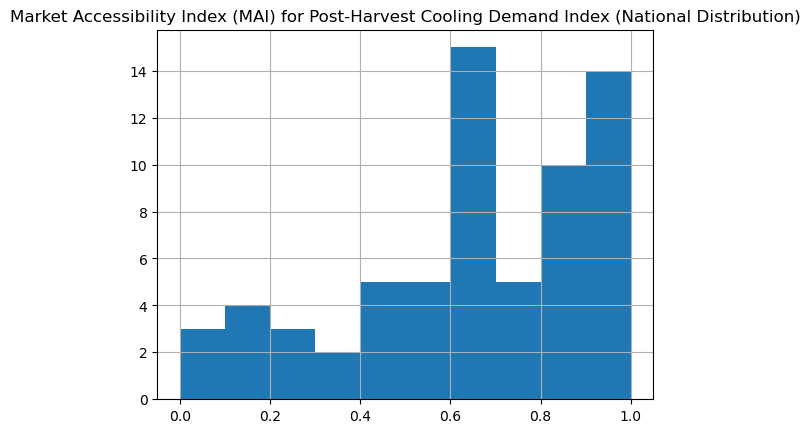

In [90]:
settles_gdf['MAI_PH_nat']= Create_MAI(
    settles_gdf,
    airport_dist_col='airport_di',
    port_dist_col='port_dist',
    railway_dist_col='railway_di',
    capital_dist_col='capital_di',
    cities_dist_col='cities_dis',
    pop_20km_col='pop_20km',
    airport_dist_w=0.1,
    port_dist_w=0.1,
    railway_dist_w=0.1,
    capital_dist_w=0.3,
    cities_dist_w=0.3,
    pop_20km_w=0.1,
)
plt=settles_gdf['MAI_PH_nat'].hist()
plt.set_title('Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (National Distribution)')

In [103]:
# Display MAI_PH_nat
# Calculate centroids of your polygon GeoDataFrame
centroids = settles_gdf.geometry.centroid
centroids_gdf = settles_gdf.copy()
centroids_gdf.geometry = centroids

# Create a kepler.gl map centered on the mean centroid location
center = [centroids.y.mean(), centroids.x.mean()]
m = leafmap.Map(center=center, zoom=8, height=600, backend='kepler')

# Add the centroids GeoDataFrame as a point layer, colored by 'MAI_PH_exp'
m.add_gdf(centroids_gdf, layer_name='Centroids')
m.add_gdf(admin_gdf, layer_name="Admin Boundary")

m.config={'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '8h9cf3',
     'type': 'geojson',
     'config': {'dataId': 'Centroids',
      'label': 'Centroids',
      'color': [34, 63, 154],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'MAI_PH_nat', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': 'sfqsih9',
     'type': 'geojson',
     'config': {'dataId': 'Admin Boundary',
      'label': 'Admin Boundary',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [18, 92, 119],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': False,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Centroids': [{'name': 'ADM2_NAME',
        'format': None},
       {'name': 'MAI_PH_exp', 'format': None},
       {'name': 'FAI_norm', 'format': None},
       {'name': 'id', 'format': None}],
      'Admin Boundary': [{'name': 'ADM1_NAME', 'format': None},
       {'name': 'ADM2_NAME', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -17.874942085630945,
   'longitude': 35.83214449690558,
   'pitch': 0,
   'zoom': 8.385597234680752,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

# Display the map
m


Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '8h9cf3', 'type': 'geojs…

### Post-Harvest Cooling Demand Index (National Distribution)

Text(0.5, 1.0, 'Post-Harvest Cooling Demand Index (National Distribution)')

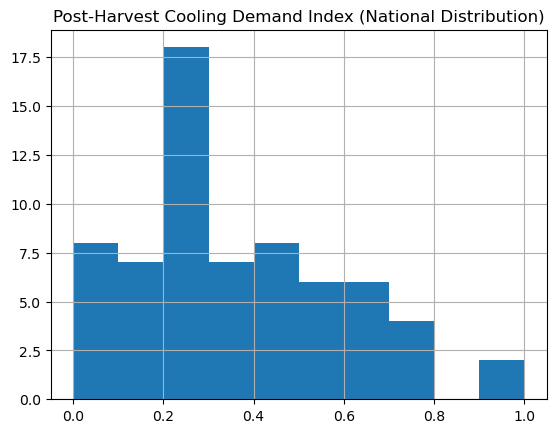

In [94]:
settles_gdf['DI_COOL_PH_nat'] = create_DI_COOL_PH(
    settles_gdf,
    FAI_norm_col='FAI_norm',
    avg_temp_col='avg_temp',
    HD30_hist_col='HD30_hist',
    MAI_PH_exp_col='MAI_PH_nat',
    FAI_w=0.5,
    avg_temp_w=0.1,
    HD30_hist_w=0.1,
    MAI_PH_exp_w=0.3,
)
plt=settles_gdf['DI_COOL_PH_nat'].hist()
plt.set_title('Post-Harvest Cooling Demand Index (National Distribution)')

In [97]:
#Visualize Post-Harvest Cooling Demand Index (National Distribution)
import leafmap.kepler as leafmap
import ipywidgets as widgets
widgets.IntSlider()  # This triggers widget extension loading


# Calculate map center from admin_gdf centroid
center = [admin_gdf.geometry.unary_union.centroid.y, admin_gdf.geometry.unary_union.centroid.x]

# Create an interactive map with kepler.gl backend
m = leafmap.Map(center=center, zoom=8, height=600, widescreen=True)

# Add your GeoDataFrames as layers
m.add_gdf(settles_gdf, layer_name="Settlements")
m.add_gdf(admin_gdf, layer_name="Admin Boundary")


m.config={'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'vbslyyq',
     'type': 'geojson',
     'config': {'dataId': 'Settlements',
      'label': 'Settlements',
      'color': [241, 92, 23],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.67,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [34, 63, 154],
       'colorRange': {'name': 'ColorBrewer OrRd-6',
        'type': 'sequential',
        'category': 'ColorBrewer',
        'colors': ['#fef0d9',
         '#fdd49e',
         '#fdbb84',
         '#fc8d59',
         '#e34a33',
         '#b30000']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'DI_COOL_PH_nat', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': '9ezwucn',
     'type': 'geojson',
     'config': {'dataId': 'Admin Boundary',
      'label': 'Admin Boundary',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 1.5,
       'strokeColor': [255, 250, 102],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': False,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {                        
                        # Show ALL columns for Admin Boundary
                        'Admin Boundary': [{'name': col, 'format': None} for col in admin_gdf.columns],
                        # Show ALL columns for Settlements 
                        'Settlements': [{'name': col, 'format': None} for col in settles_gdf.columns]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -17.87882032093565,
   'longitude': 35.77426007704404,
   'pitch': 0,
   'zoom': 8.520916581219378,
   'isSplit': False},
  'mapStyle': {'styleType': 'satellite',
   'topLayerGroups': {},
   'visibleLayerGroups': {},
   'threeDBuildingColor': [3.7245996603793508,
    6.518049405663864,
    13.036098811327728],
   'mapStyles': {}}}}
  
m

Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vbslyyq', 'type': 'geoj…

## Post-Harvest Cooling Demand Index (Fresh Markets)

### Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (Fresh Markets)

Text(0.5, 1.0, 'Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (Fresh Markets)')

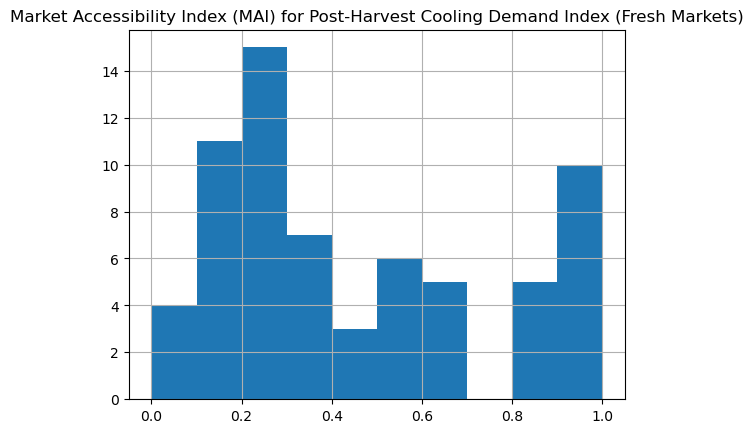

In [101]:
settles_gdf['MAI_PH_fre']= Create_MAI(
    settles_gdf,
    airport_dist_col='airport_di',
    port_dist_col='port_dist',
    railway_dist_col='railway_di',
    capital_dist_col='capital_di',
    cities_dist_col='cities_dis',
    pop_20km_col='pop_20km',
    airport_dist_w=0,
    port_dist_w=0,
    railway_dist_w=0,
    capital_dist_w=0,
    cities_dist_w=0.2,
    pop_20km_w=0.8,
)
plt=settles_gdf['MAI_PH_fre'].hist()
plt.set_title('Market Accessibility Index (MAI) for Post-Harvest Cooling Demand Index (Fresh Markets)')

In [104]:
# Display MAI_PH_fre
# Calculate centroids of your polygon GeoDataFrame
centroids = settles_gdf.geometry.centroid
centroids_gdf = settles_gdf.copy()
centroids_gdf.geometry = centroids

# Create a kepler.gl map centered on the mean centroid location
center = [centroids.y.mean(), centroids.x.mean()]
m = leafmap.Map(center=center, zoom=8, height=600, backend='kepler')

# Add the centroids GeoDataFrame as a point layer, colored by 'MAI_PH_fre'
m.add_gdf(centroids_gdf, layer_name='Centroids')
m.add_gdf(admin_gdf, layer_name="Admin Boundary")

m.config={'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '8h9cf3',
     'type': 'geojson',
     'config': {'dataId': 'Centroids',
      'label': 'Centroids',
      'color': [34, 63, 154],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'MAI_PH_fre', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': 'sfqsih9',
     'type': 'geojson',
     'config': {'dataId': 'Admin Boundary',
      'label': 'Admin Boundary',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [18, 92, 119],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': False,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Centroids': [{'name': 'ADM2_NAME',
        'format': None},
       {'name': 'MAI_PH_exp', 'format': None},
       {'name': 'FAI_norm', 'format': None},
       {'name': 'id', 'format': None}],
      'Admin Boundary': [{'name': 'ADM1_NAME', 'format': None},
       {'name': 'ADM2_NAME', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -17.874942085630945,
   'longitude': 35.83214449690558,
   'pitch': 0,
   'zoom': 8.385597234680752,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

# Display the map
m


Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '8h9cf3', 'type': 'geojs…

### Post-Harvest Cooling Demand Index (Fresh Markets)

Text(0.5, 1.0, 'Post-Harvest Cooling Demand Index (Fresh Markets)')

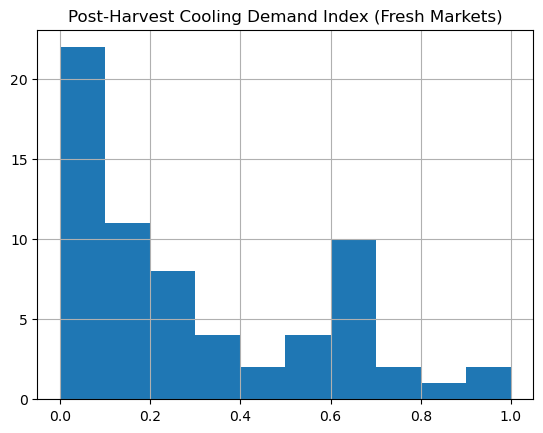

In [105]:
settles_gdf['DI_COOL_PH_fre'] = create_DI_COOL_PH(
    settles_gdf,
    FAI_norm_col='FAI_norm',
    avg_temp_col='avg_temp',
    HD30_hist_col='HD30_hist',
    MAI_PH_exp_col='MAI_PH_fre',
    FAI_w=0.5,
    avg_temp_w=0.1,
    HD30_hist_w=0.1,
    MAI_PH_exp_w=0.3,
)
plt=settles_gdf['DI_COOL_PH_fre'].hist()
plt.set_title('Post-Harvest Cooling Demand Index (Fresh Markets)')

In [106]:
#Visualize Post-Harvest Cooling Demand Index (Fresh Markets)

# Calculate map center from admin_gdf centroid
center = [admin_gdf.geometry.unary_union.centroid.y, admin_gdf.geometry.unary_union.centroid.x]

# Create an interactive map with kepler.gl backend
m = leafmap.Map(center=center, zoom=8, height=600, widescreen=True)

# Add your GeoDataFrames as layers
m.add_gdf(settles_gdf, layer_name="Settlements")
m.add_gdf(admin_gdf, layer_name="Admin Boundary")


m.config={'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'vbslyyq',
     'type': 'geojson',
     'config': {'dataId': 'Settlements',
      'label': 'Settlements',
      'color': [241, 92, 23],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.67,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [34, 63, 154],
       'colorRange': {'name': 'ColorBrewer OrRd-6',
        'type': 'sequential',
        'category': 'ColorBrewer',
        'colors': ['#fef0d9',
         '#fdd49e',
         '#fdbb84',
         '#fc8d59',
         '#e34a33',
         '#b30000']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'DI_COOL_PH_fre', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}},
    {'id': '9ezwucn',
     'type': 'geojson',
     'config': {'dataId': 'Admin Boundary',
      'label': 'Admin Boundary',
      'color': [218, 112, 191],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'geojson': '_geojson'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 1.5,
       'strokeColor': [255, 250, 102],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'enableElevationZoomFactor': True,
       'stroked': True,
       'filled': False,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {                        
                        # Show ALL columns for Admin Boundary
                        'Admin Boundary': [{'name': col, 'format': None} for col in admin_gdf.columns],
                        # Show ALL columns for Settlements 
                        'Settlements': [{'name': col, 'format': None} for col in settles_gdf.columns]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -17.87882032093565,
   'longitude': 35.77426007704404,
   'pitch': 0,
   'zoom': 8.520916581219378,
   'isSplit': False},
  'mapStyle': {'styleType': 'satellite',
   'topLayerGroups': {},
   'visibleLayerGroups': {},
   'threeDBuildingColor': [3.7245996603793508,
    6.518049405663864,
    13.036098811327728],
   'mapStyles': {}}}}
  
m

Map(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vbslyyq', 'type': 'geoj…

# Visualization of results

# Multi-Criteria Analysis

## Use case 1

## Use case 2